In [1]:
import numpy as np #importing essential library
import matplotlib.pyplot as plt

In [2]:
def func(m,x,c): #defining basic linear regression function, m and c being unknown
    return m*x+c

In [3]:
def cost_func(actual,predict):
    actual = np.array(actual).reshape(-1) #reshaping into a matrix of 1 dimension
    predict = np.array(predict).reshape(-1)
    
    return (sum((actual-predict)**2))/len(actual)
    

In [4]:
# partial derievative formula: "https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png"
def partial_deriv_m(actual,m,x,c):
    actual = np.array(actual).reshape(-1)
    return (-2*(sum(x*(actual - np.array(func(m,x,c)).reshape(-1)))))/len(actual)
    

def partial_deriv_c(actual,m,x,c):
    actual = np.array(actual).reshape(-1)
    return (-2*(sum(actual - np.array(func(m,x,c)).reshape(-1))))/len(actual)

In [5]:
def accuracy(pred,actual):
    pred = np.array(pred).reshape(-1)
    actual= np.array(actual).reshape(-1)
    
    actual_mean=np.mean(actual)
    
    
    return 1- ((cost_func(actual,pred))/(cost_func(actual,[actual_mean for i in range(len(actual))])))   
    
    
    #r-squared error

In [6]:
import random as rd
series_x = np.random.normal(3,0.2,100)
series_y = ((series_x + np.random.normal(3,0.2,100))*3) - 100 #line with negetive slope 

In [7]:
def linear_regression(data,target,learning_rate = 0.0001,iteration = 1000):
    data = np.array(data).reshape(-1)
    target= np.array(target).reshape(-1)
    m = 0
    c = 0
    for i in range(iteration):
        m -= learning_rate * partial_deriv_m(target,m,data,c)
        c -= learning_rate * partial_deriv_c(target,m,data,c)
    print(m,c,i,cost_func(target,func(m,data,c)))
    return m,c,cost_func(target,func(m,data,c))  

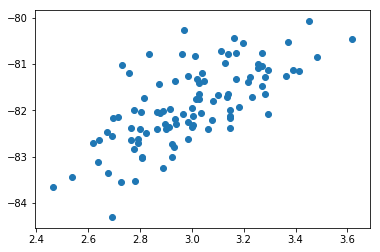

In [8]:
plt.scatter(series_x,series_y)

In [9]:
pred_var = linear_regression(series_x,series_y,learning_rate = 0.08,iteration = 10000)
pred = func(pred_var[0],series_x,pred_var[1])

2.5974677140027853 -89.67882241234133 9999 0.36152945795520935


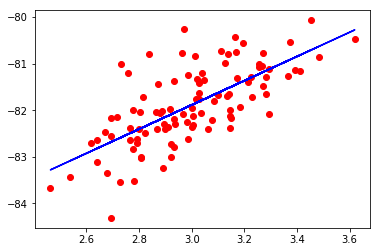

In [10]:
plt.plot(series_x,series_y, 'ro', series_x,pred, 'b-')

In [11]:
print(accuracy(pred,series_y))

0.48512012557176043


In [12]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(series_x.reshape(-1,1),series_y)
predi = clf.predict(series_x.reshape(-1,1))
print(accuracy(predi,series_y))

0.48512061299802667


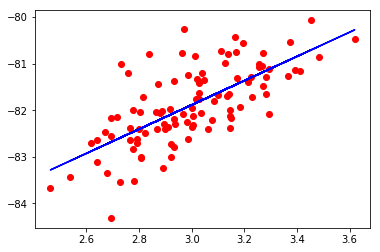

In [13]:
plt.plot(series_x,series_y, 'ro', series_x,predi, 'b-')